<a href="https://colab.research.google.com/github/sunmarknatecom/computer_vision/blob/master/temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 폴더 삭제

In [ ]:
# import shutil, os

# dir_path = '/content/drive/MyDrive/segmentation/data/seg_002'
# shutil.rmtree(dir_path)

# 파일 폴더 압축

In [ ]:
import shutil

path = '/content/drive/MyDrive/segmentation/data/'
idx = 'seg_006'

shutil.make_archive(idx, 'zip', path+idx)

'/content/seg_006.zip'

# 압축파일 해제

1.   path 확정
2.   압축 파일 이름 확정

In [ ]:
path = '/content/drive/MyDrive/segmentation/data/seg_002/mask/'

In [2]:
import os, zipfile

mask_zip = zipfile.ZipFile('/content/drive/MyDrive/segmentation/zip/zip.zip')
mask_zip.extractall('/content/drive/MyDrive/segmentation/zip/')
mask_zip.close()

In [ ]:
print(len(os.listdir(path)))

356


In [ ]:
import os

# DICOM 파일이름 정리

1. path 확정 (root, idx, group)
2. 

In [ ]:
root = '/content/drive/MyDrive/segmentation/data/'
idx = 'seg_006/'

In [ ]:
root = '/content/drive/MyDrive/segmentation/data/'
idx = 'seg_006/'
group = 'dicom/'

path = root + idx + group

f_list = os.listdir(path)

for elem in f_list:
    old_name = path + elem
    new_name = path + idx[:-1] + '_dcm_' + elem[-7:]
    os.rename(old_name, new_name)

# IMAGE 파일 이름 정리

In [ ]:
root = '/content/drive/MyDrive/segmentation/data/'
idx = 'seg_006/'
group = 'image/'

path = root + idx + group

f_list = os.listdir(path)

for elem in f_list:
    old_name = path + elem
    new_name = path + idx[:-1] + '_img_' + elem[2:5] + '.jpg'
    os.rename(old_name, new_name)

# MASK 파일 이름 정리

In [ ]:
root = '/content/drive/MyDrive/segmentation/data/'
idx = 'seg_006/'
group = 'mask/'

path = root + idx + group

f_list = os.listdir(path)

for elem in f_list:
    old_name = path + elem
    new_name = path + idx[:-1] + '_msk_' + elem[2:5] + '.png'
    os.rename(old_name, new_name)

# PREDICTION 파일 이름 정리

In [ ]:
root = '/content/drive/MyDrive/segmentation/data/'
idx = 'seg_006/'
group = 'prediction/'

path = root + idx + group

f_list = os.listdir(path)

for elem in f_list:
    old_name = path + elem
    new_name = path + idx[:-1] + '_prd_' + elem[2:5] + '.png'
    os.rename(old_name, new_name)

In [4]:
!pip install pynrrd

## NRRD to PNG

In [5]:
import nrrd, os
import numpy as np
from PIL import Image

In [29]:
path = "/content/drive/MyDrive/segmentation/data/seg_016/seg_016_2"
filename = '/seg_016_2_did.nrrd'

os.mkdir(path+'/mask/')

data, header = nrrd.read(path+"/mask_slicer"+filename, index_order='C')
data[data==0] = 1

length = len(data)

for i in range(length):
    tmp_path = path 
    tmp_file_name = filename[:-8]+'msk_%03d.png'%(i+1)
    data_obj = data[-(i+1)]
    in_obj = Image.fromarray(data_obj)
    in_obj.save(tmp_path+"/mask"+tmp_file_name)

In [ ]:
from glob import glob
import os
file_list = sorted(glob('*.png'))
for elem in file_list:
    new_name = 'seg_016_2_msk_'+elem[-7:]
    os.rename(elem, new_name)

In [ ]:
path = '/content/drive/MyDrive/segmentation/data/'

import os, zipfile

for i in range(3,17):
    name = 'seg_0%02d'%i
    mask_zip = zipfile.ZipFile(path+name+'.zip')
    mask_zip.extractall(path+name)
    mask_zip.close()

In [ ]:
path = '/content/drive/MyDrive/segmentation/data/seg_016/seg_016_2/mask_test/'

from glob import glob

file_list = sorted(glob(path+'*.png'))

In [ ]:
file_list[:10]

['/content/drive/MyDrive/segmentation/data/seg_016/seg_016_2/mask_test/seg_016_2_msk_001.png',
 '/content/drive/MyDrive/segmentation/data/seg_016/seg_016_2/mask_test/seg_016_2_msk_002.png',
 '/content/drive/MyDrive/segmentation/data/seg_016/seg_016_2/mask_test/seg_016_2_msk_003.png',
 '/content/drive/MyDrive/segmentation/data/seg_016/seg_016_2/mask_test/seg_016_2_msk_004.png',
 '/content/drive/MyDrive/segmentation/data/seg_016/seg_016_2/mask_test/seg_016_2_msk_005.png',
 '/content/drive/MyDrive/segmentation/data/seg_016/seg_016_2/mask_test/seg_016_2_msk_006.png',
 '/content/drive/MyDrive/segmentation/data/seg_016/seg_016_2/mask_test/seg_016_2_msk_007.png',
 '/content/drive/MyDrive/segmentation/data/seg_016/seg_016_2/mask_test/seg_016_2_msk_008.png',
 '/content/drive/MyDrive/segmentation/data/seg_016/seg_016_2/mask_test/seg_016_2_msk_009.png',
 '/content/drive/MyDrive/segmentation/data/seg_016/seg_016_2/mask_test/seg_016_2_msk_010.png']

In [ ]:
import os
lst_file = []

for elem in file_list:
    temp_list = os.path.basename(elem)
    lst_file.append(temp_list)

In [ ]:
lst_file[:10]

['seg_016_2_msk_001.png',
 'seg_016_2_msk_002.png',
 'seg_016_2_msk_003.png',
 'seg_016_2_msk_004.png',
 'seg_016_2_msk_005.png',
 'seg_016_2_msk_006.png',
 'seg_016_2_msk_007.png',
 'seg_016_2_msk_008.png',
 'seg_016_2_msk_009.png',
 'seg_016_2_msk_010.png']

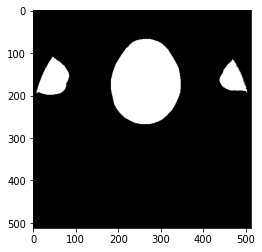

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img_obj = Image.open(file_list[0])
np_arr = np.array(img_obj, dtype='uint8')
plt.imshow(np_arr, cmap='gray')
plt.show()